# Cores

Investigate relatedness of Murko scaffolds (_a.k.a._ 'cores') using artificial data. 

This is motivated by the observatiob that molecules that have scaffolds with minor (and largely isosteric) differences (_e.g._ thiophene and furan or cyclohexane and pyran) can sometimes have remarkably low fingerprint-based similarities.

If simple similarity-based mesasures are used, the (pharmacophoric) diversity of the data set could be over-estimated.

If these trivially-different core could be identified, a more realistic estimate of the chemical space spanned by the molecules might be feasible.

See the notebook [Isosteric_Transformations](Isosteric_Transformations.ipynb) for some ideas on how this idea might be extended further.

In [1]:
from collections import OrderedDict as odict

import networkx as nx

from local_utils.data_utils import pprint

from core_sets import get_core_diffs, get_core_sets

In [2]:
# import core_sets

# pprint(core_sets.weights)

In [3]:
# # Set weights...

# core_sets.weights = odict((
#       ('mol_atom_diff',  1.0)
#     , ('mcs_atom_diff',  1.0)
#     , ('ring_bond_diff', 5.0)
#     , ('mcs_bond_diff',  2.0)
# ))

### Test 'cores'

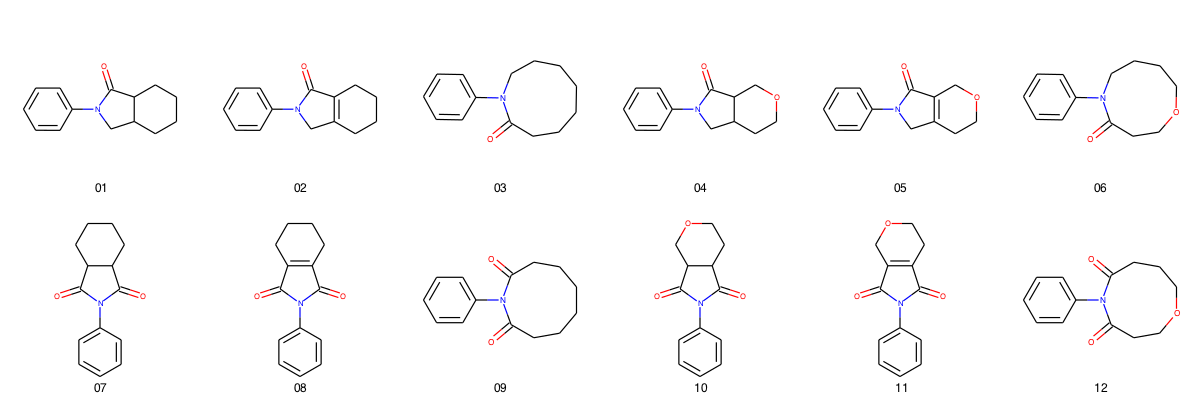

In [4]:
smiles = [
      'O=C1C2C(CN1c1ccccc1)CCCC2'
    , 'O=C1C2=C(CN1c1ccccc1)CCCC2'
    , 'O=C1CCCCCCCN1c1ccccc1'

    , 'O=C1C2C(CN1c1ccccc1)CCOC2'
    , 'O=C1C2=C(CN1c1ccccc1)CCOC2'
    , 'O=C1CCOCCCCN1c1ccccc1'

    , 'O=C1C2C(C(=O)N1c1ccccc1)CCCC2'
    , 'O=C1C2=C(C(=O)N1c1ccccc1)CCCC2'
    , 'O=C1CCCCCCC(=O)N1c1ccccc1'

    , 'O=C1C2C(C(=O)N1c1ccccc1)CCOC2'
    , 'O=C1C2=C(C(=O)N1c1ccccc1)CCOC2'
    , 'O=C1CCOCCCC(=O)N1c1ccccc1'
]

cores = [Chem.MolFromSmiles(x) for x in smiles]

for n, mol in enumerate(cores, 1): mol.SetProp('_Name', "{:02d}".format(n))

Draw.MolsToGridImage(cores, legends=[x.GetProp('_Name') for x in cores], molsPerRow=6)

### Get scores for pairs of cores

In [5]:
df = get_core_diffs(cores)

df.shape

(66, 7)

,i,j,mol_0,mol_1,sim,diff_1,diff_2
0,0,1,,,0.42,2,2
1,0,2,,,0.42,3,3
2,0,3,,,0.63,1,0
3,0,4,,,0.33,3,2
4,0,5,,,0.37,4,3
5,0,6,,,0.56,1,1
6,0,7,,,0.37,3,3
7,0,8,,,0.38,4,4
8,0,9,,,0.37,2,1
9,0,10,,,0.30,4,3

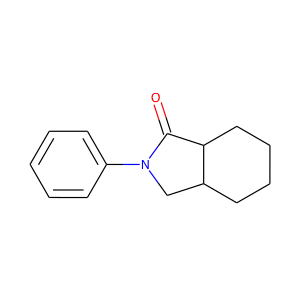
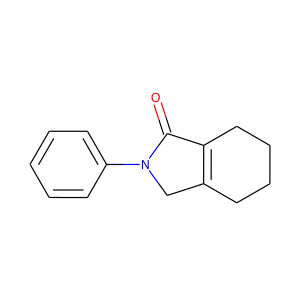
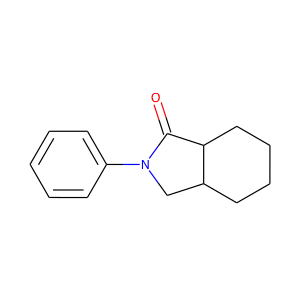
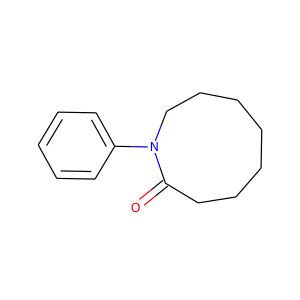
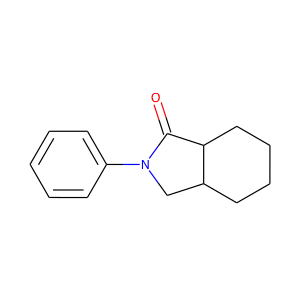
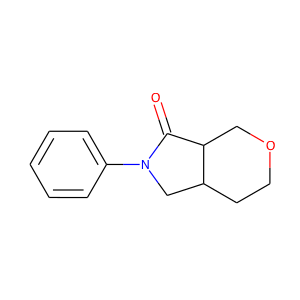
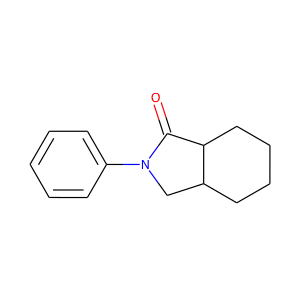
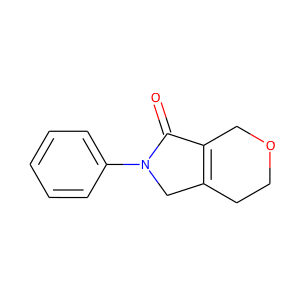
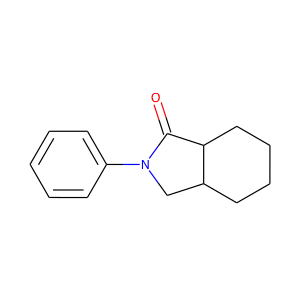
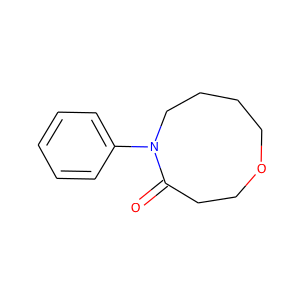
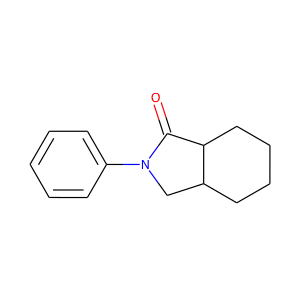
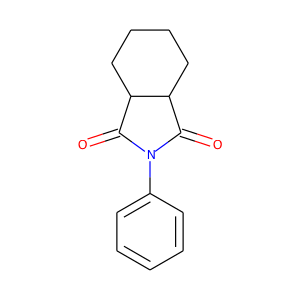
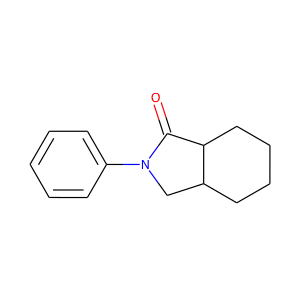
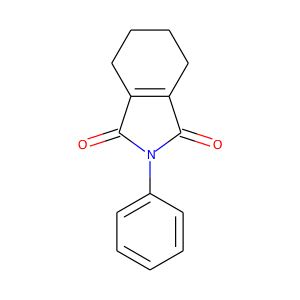
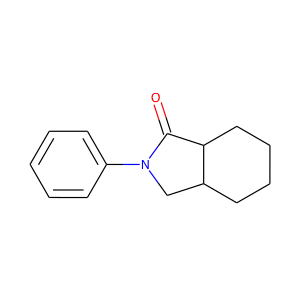
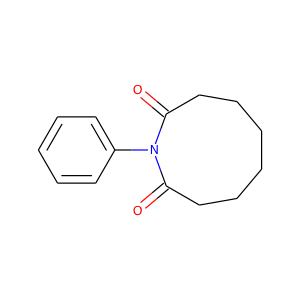
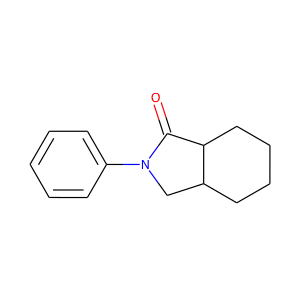
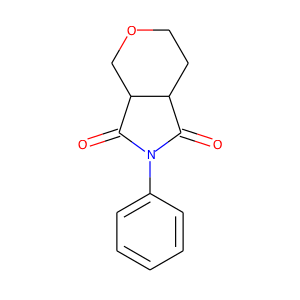
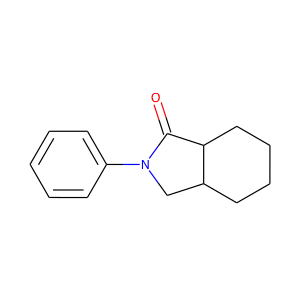
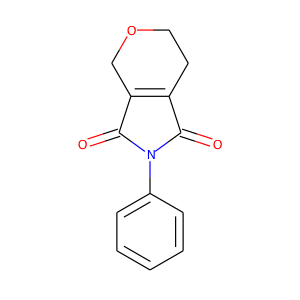
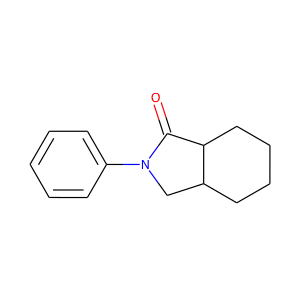
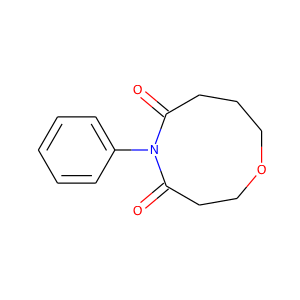
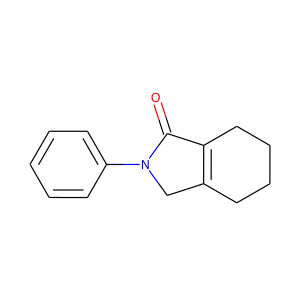
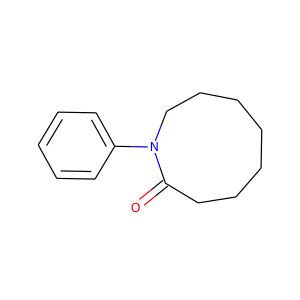
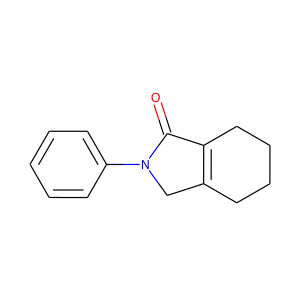
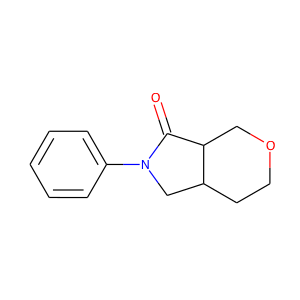
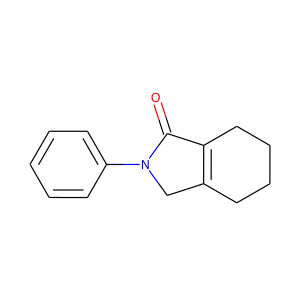
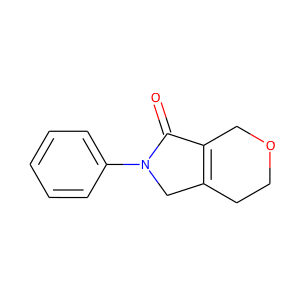
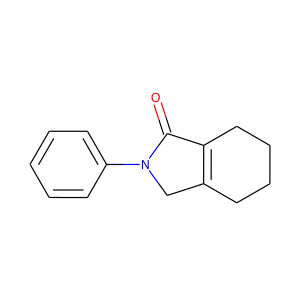
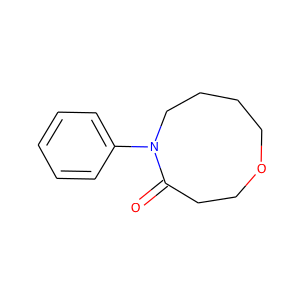
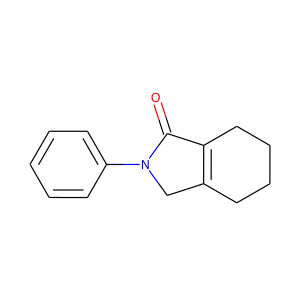
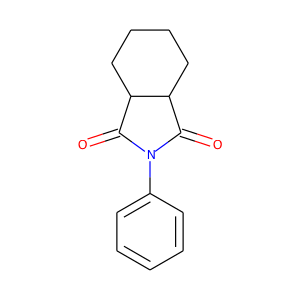
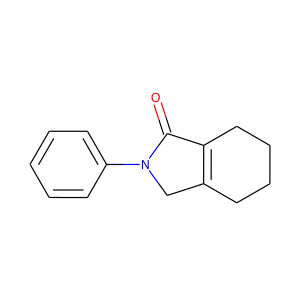
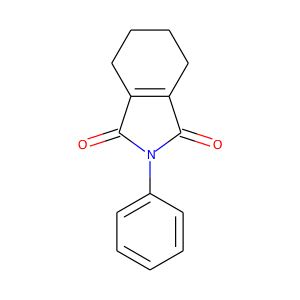
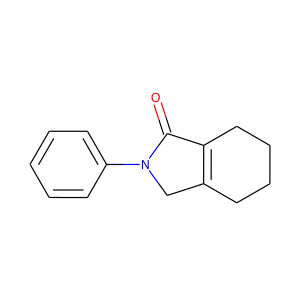
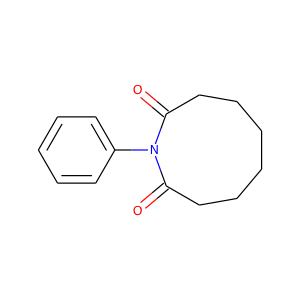
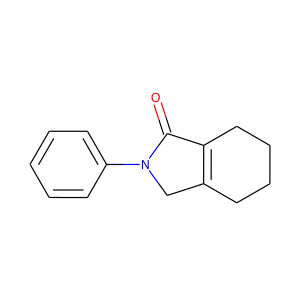
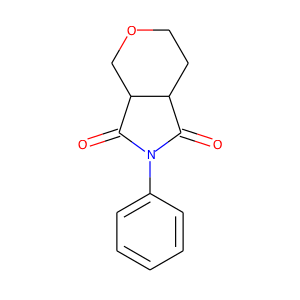
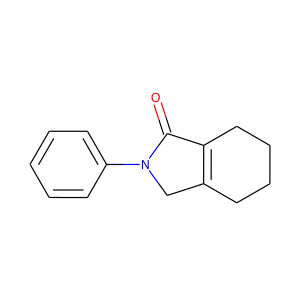
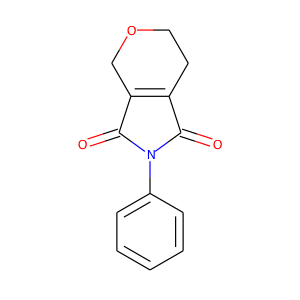
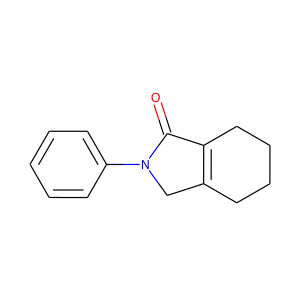
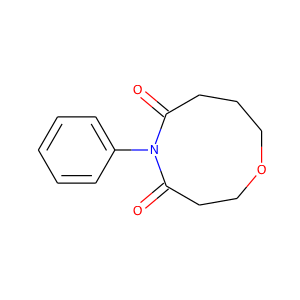
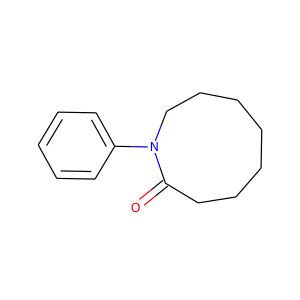
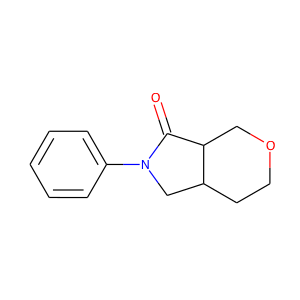
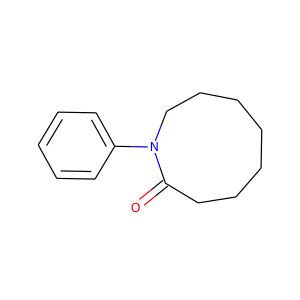
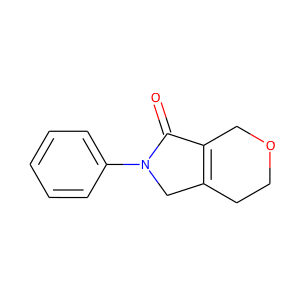
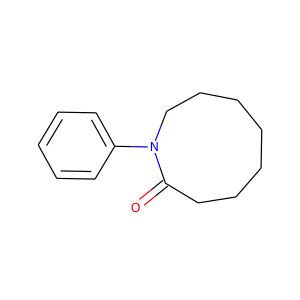
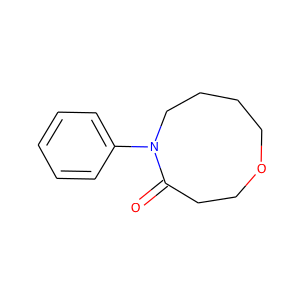
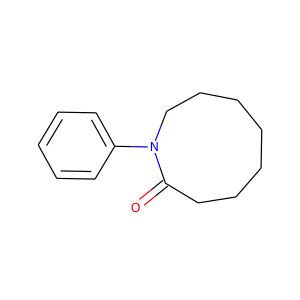
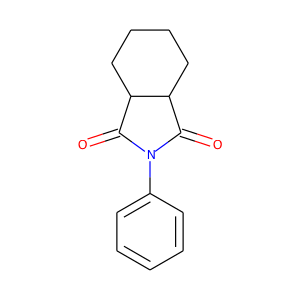
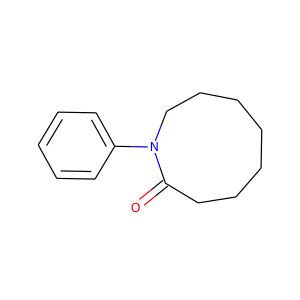
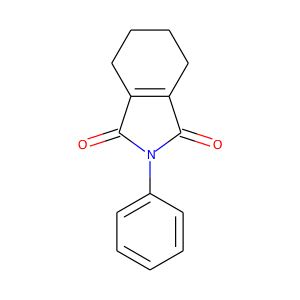
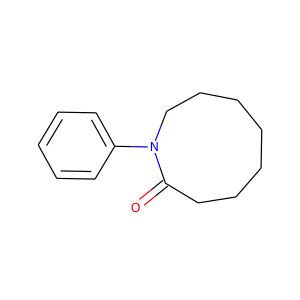
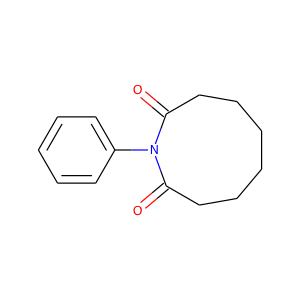
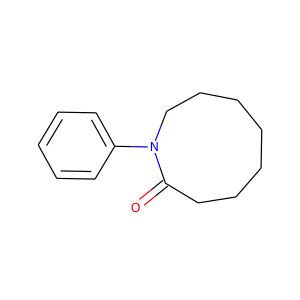
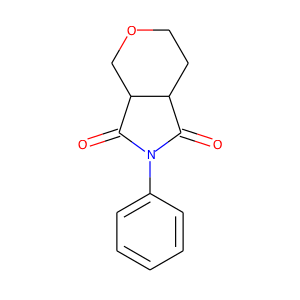
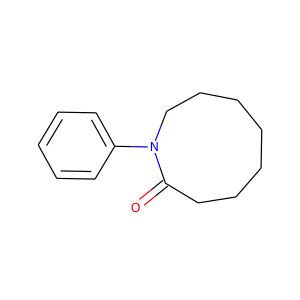
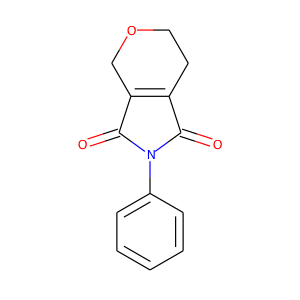
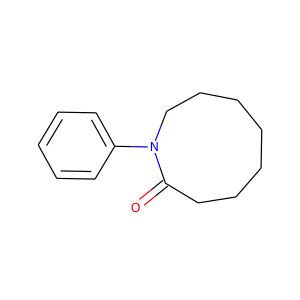
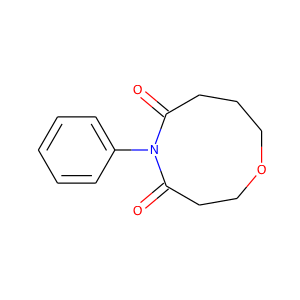
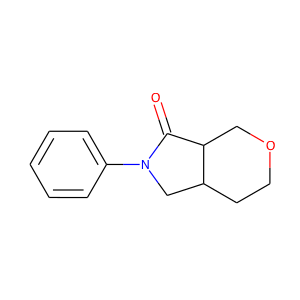
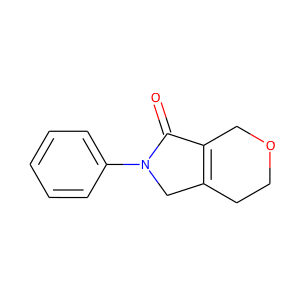
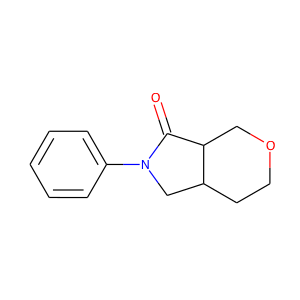
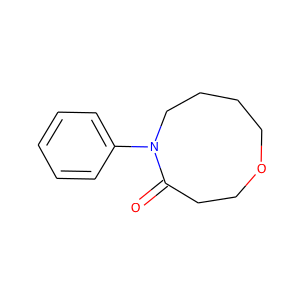
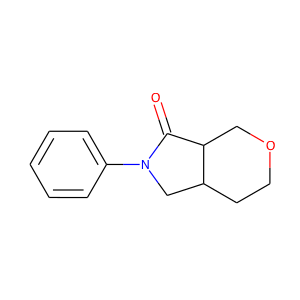
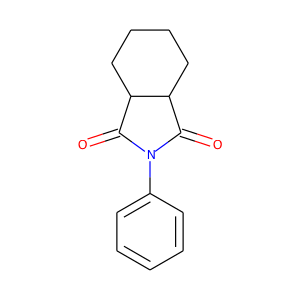
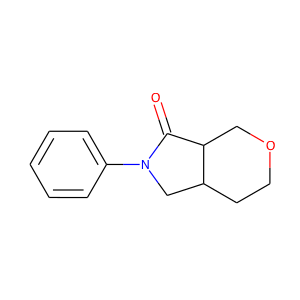
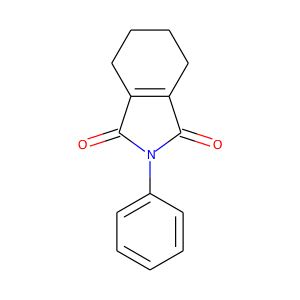
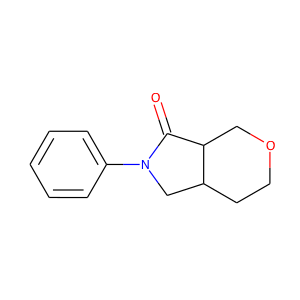
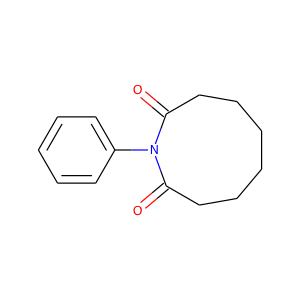
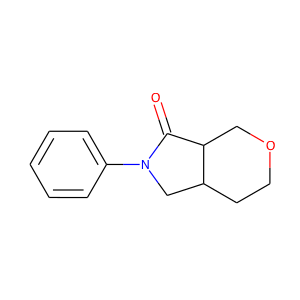
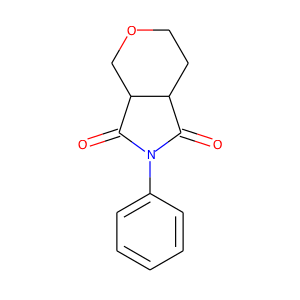
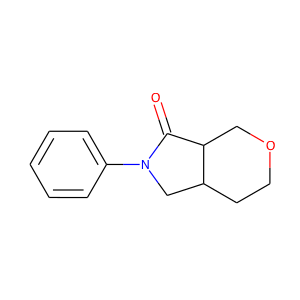
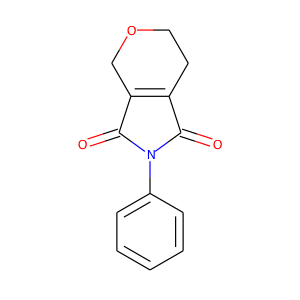
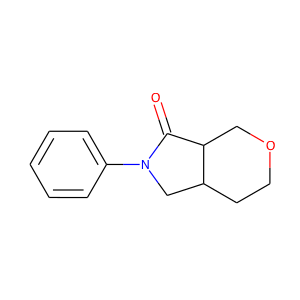
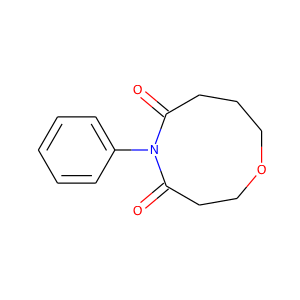
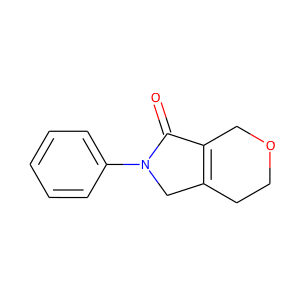
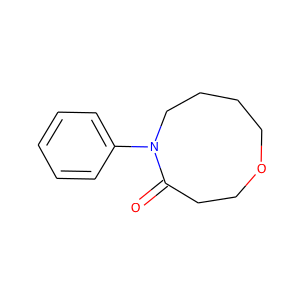
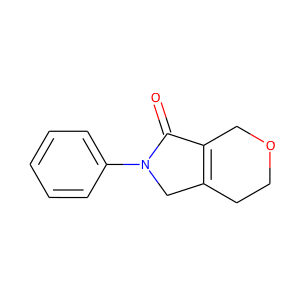
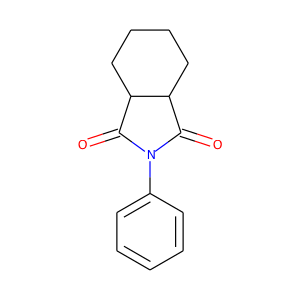
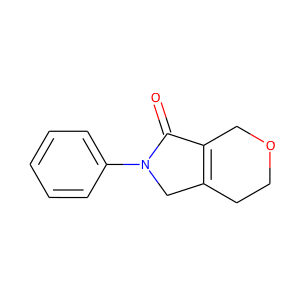
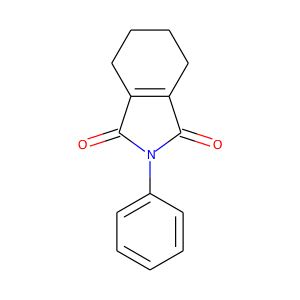
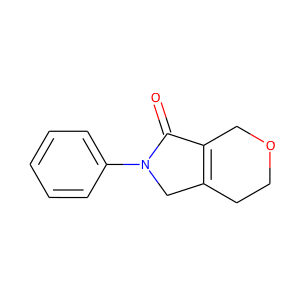
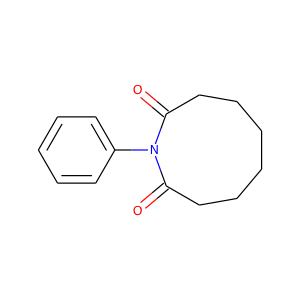
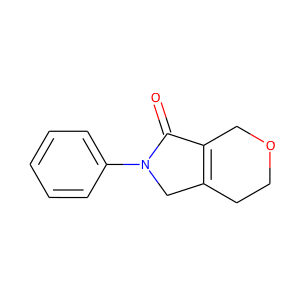
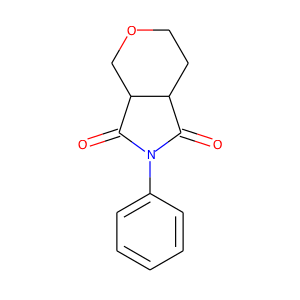
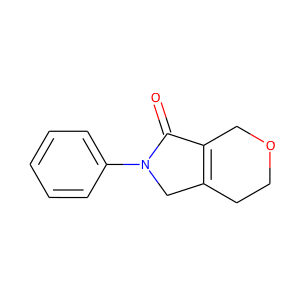
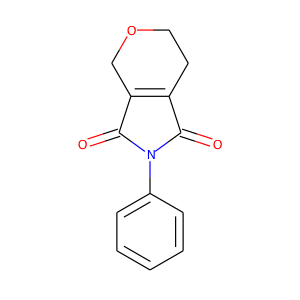
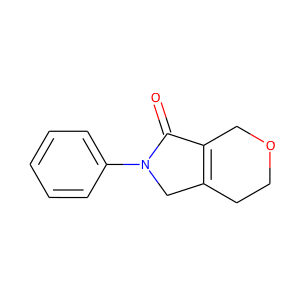
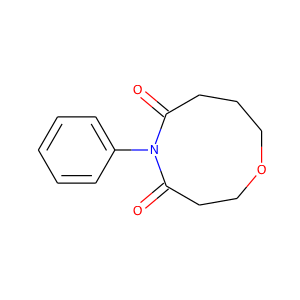
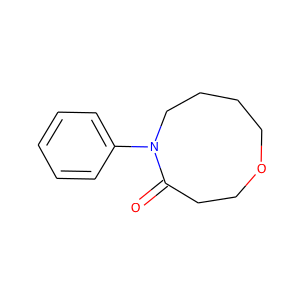
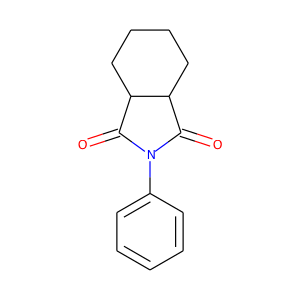
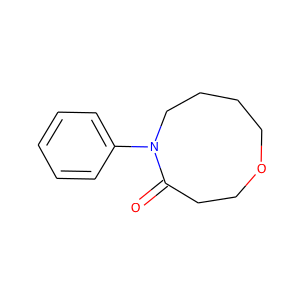
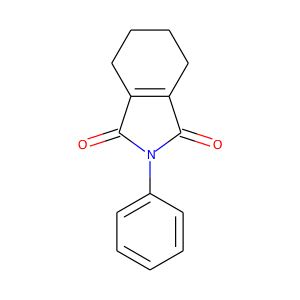
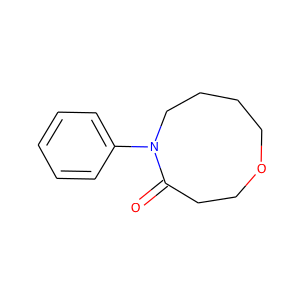
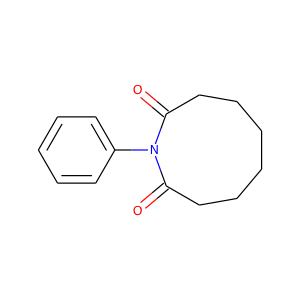
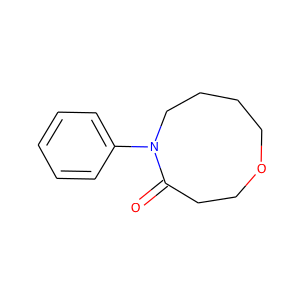
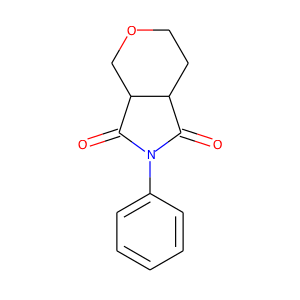
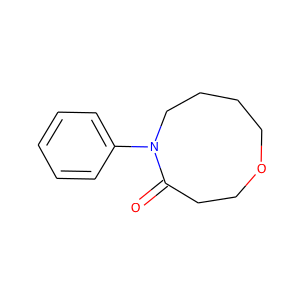
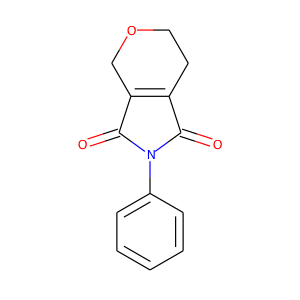
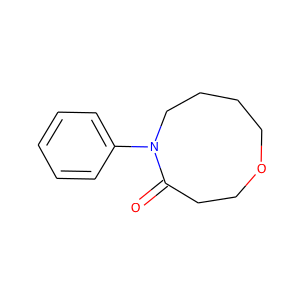
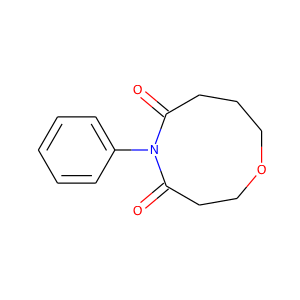
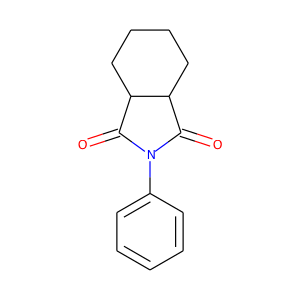
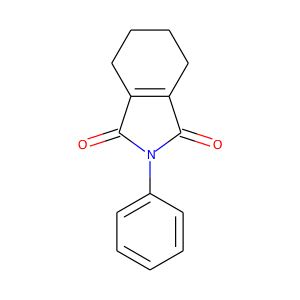
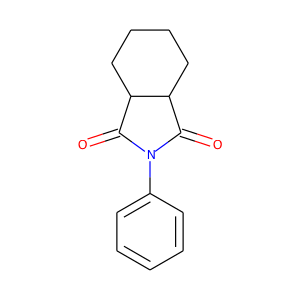
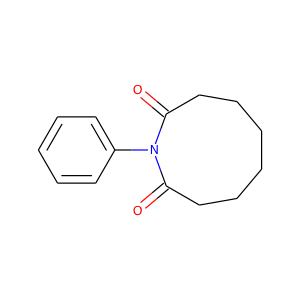
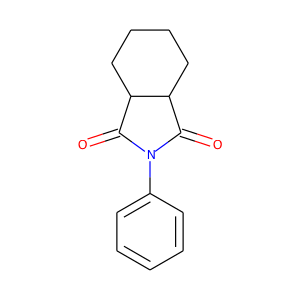
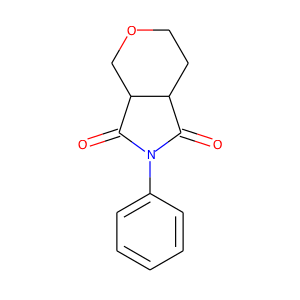
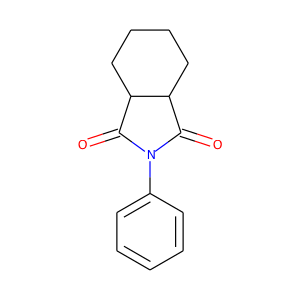
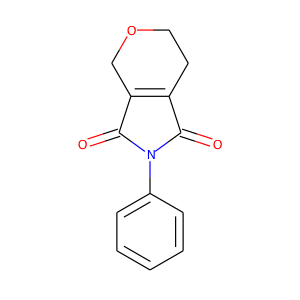
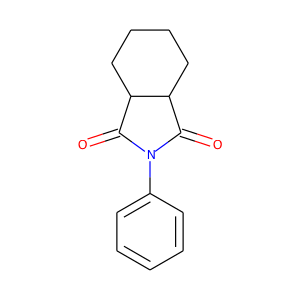
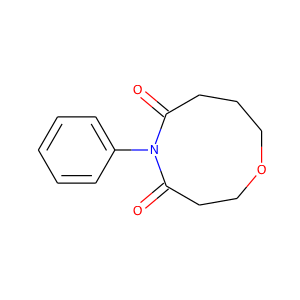
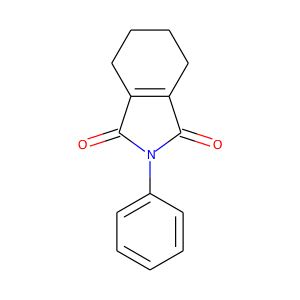
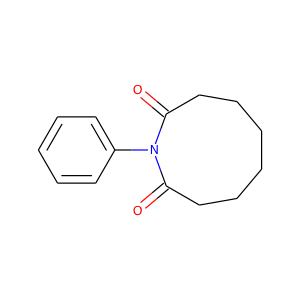
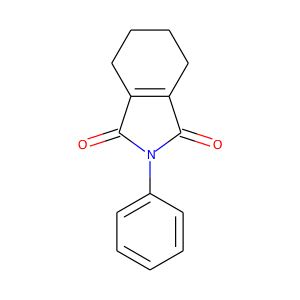
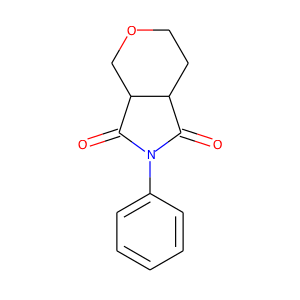
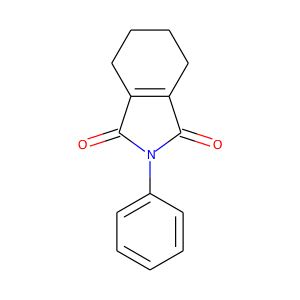
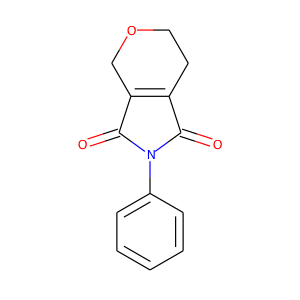
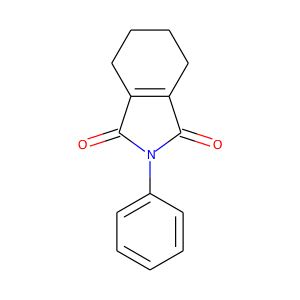
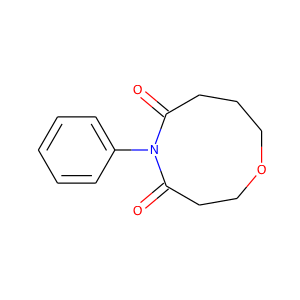
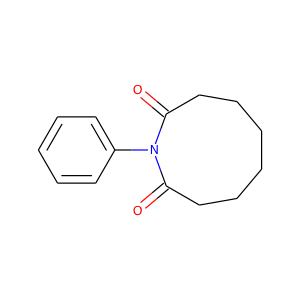
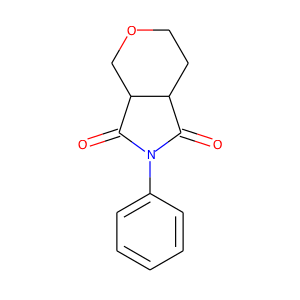
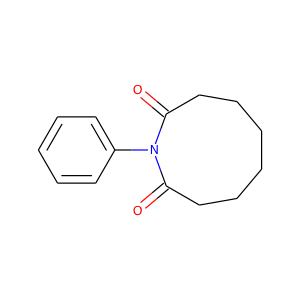
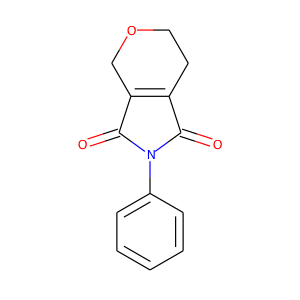
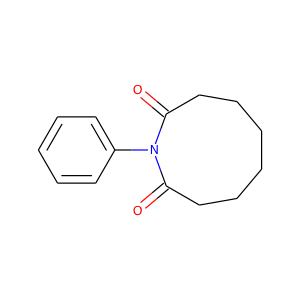
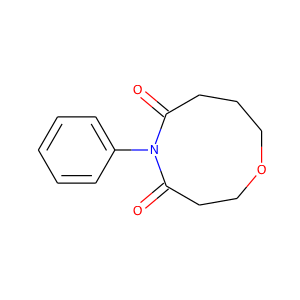
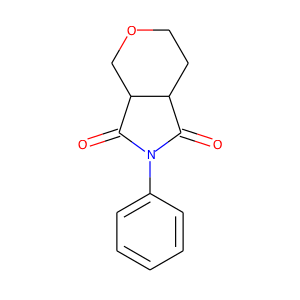
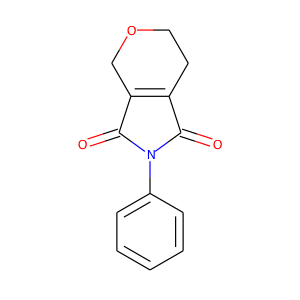
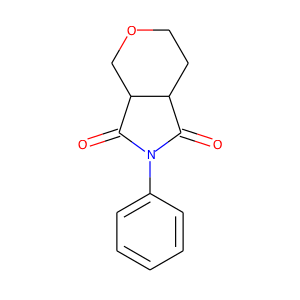
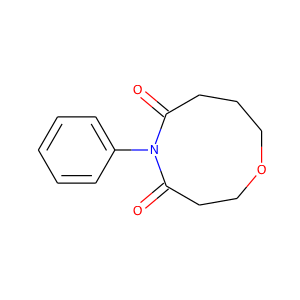
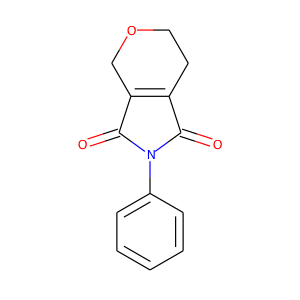
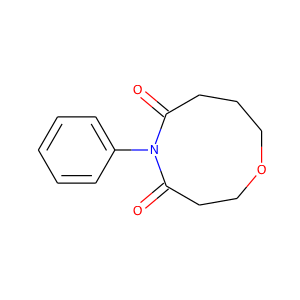

In [6]:
df

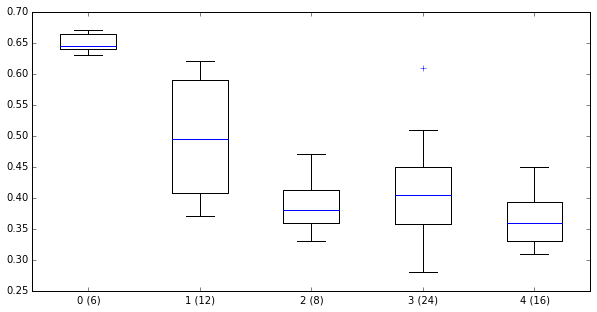

In [7]:
# Plot relationship between relatedness-score and fingerprint similarity

data = odict((int(score), list(group['sim'])) for score, group in df.groupby('diff_2'))

fig = plt.figure(figsize=(10, 5))

ax1 = fig.add_subplot(111)

ax1.boxplot(data.values(), labels=["{} ({})".format(k, len(v)) for k, v in data.items()])

plt.show()

### Using graphs to identify sets of 'equivalent' cores

In [8]:
core_sets, [graph, node_labels, edge_labels] = get_core_sets(df, threshold=1)

logging.info("No. core sets = {}".format(len(core_sets)))

[2015/Jul/21 12:07:17 INFO    ] No. core sets = 3


/usr/local/lib/python2.7/site-packages/matplotlib-1.4.x-py2.7-macosx-10.8-x86_64.egg/matplotlib/text.py:52: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if rotation in ('horizontal', None):
/usr/local/lib/python2.7/site-packages/matplotlib-1.4.x-py2.7-macosx-10.8-x86_64.egg/matplotlib/text.py:54: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  elif rotation == 'vertical':


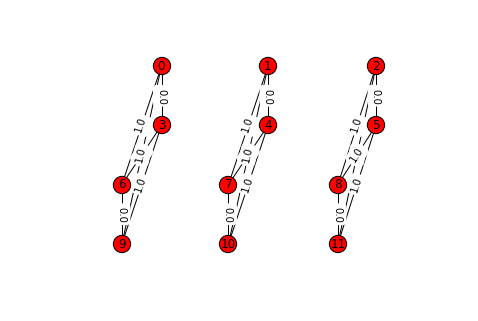

In [9]:
# Draw core graph...

# pos = nx.spring_layout(graph, k=0.5, iterations=1000, scale=100.0)

pos = nx.graphviz_layout(graph, prog='dot') 

nx.draw(graph, pos)

_ = nx.draw_networkx_labels(graph, pos, labels=node_labels)

_ = nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels)

In [10]:
# Display set of cores...

img_dir = 'images'

html = '<h2>Core Sets</h2> <hr>'

for n, core_set in enumerate(core_sets, 1):
    
    img = Draw.MolsToGridImage([cores[i] for i in core_set], legends=[cores[i].GetProp('_Name') for i in core_set], molsPerRow=6)
    
    filename = "{}/img_{:02d}.png".format(img_dir, n)
    
    img.save(filename)
    
    html += '<h3>{:02d}</h3> <img src="{}" /> </br> <hr>\n'.format(n, filename)
    
HTML(html)